In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_predict
from sklearn.metrics import roc_curve
from ggplot import *
from data_cleaning import *
from plots import *
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Import the data

In [191]:
df = pd.DataFrame.from_csv('data/cancer_data.csv', index_col = None)

#### Look at the data. Make sure the index column is correct.

In [192]:
pd.set_option('display.max_columns', 50)
df.head()

,sample,clump_thick,size_unif,shape_unif,marg_adh,eph_size,bare_nuc,bland_chrom,norm_nuc,motises,malig
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


#### Get a list of the column names

In [193]:
ref_column = 'malig'
col_names = list(df.columns.values)
exclude = ['malig', 'bare_nuc', 'sample']
features = [i for i in col_names if i not in exclude]

#### Look at the datatypes in each column.

In [194]:
print_col_datatype(df, col_names)

sample : int64
clump_thick : int64
size_unif : int64
shape_unif : int64
marg_adh : int64
eph_size : int64
bare_nuc : object
bland_chrom : int64
norm_nuc : int64
motises : int64
malig : int64


#### Convert datatype of a column to float.

In [53]:
for idx, row in df.iterrows():
    df.bare_nuc[idx]  = float(row['bare_nuc'])

/Users/berkeleyalmand/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


#### Enter columns that you expect to have contain numeric values that came up as object to find strange inputs.

In [656]:
# non_numeric_value_dict = locate_non_numeric_values(df, 'five')

#### Replace the strange values with NaNs

In [52]:
df.bare_nuc.replace('?', np.nan, inplace=True)

#### Drop any unwanted columns

In [620]:
#df.drop(['col_1_name', 'col_2_name'], axis=1, inplace=True)    

In [665]:
df.head()

,FormattedDate,away_WP,to_WP,day_of_week,skiers
0,11/12/11,2075,2119,5,0
1,11/13/11,2882,1371,6,44
2,11/14/11,1720,1607,0,-1467
3,11/15/11,1539,1804,1,-1580
4,11/16/11,1695,1808,2,-1315


#### Change all NaNs to pandas 'None'.

In [81]:
df.replace({'NaN':None, 'nan':None}, inplace=True)

#### Save and print column names for columns that contain NaNs.

In [82]:
nan_columns = find_columns_containing_nan(df, col_names)

Columns containing NaNs:  []


#### Decide how to deal with Nans (1 = delete all rows containing NaN, 2 = replace with empty strings, 3 = fill with mean of column, 4 = fill with previous value with limit of 1 value forward, 5 = delete all columns containing NaN, 6 = fill by interpolating). Information for more complex interpolation methods available at: http://pandas.pydata.org/pandas-docs/stable/missing_data.html

In [10]:
fill_method = 3
df = replace_missing_values(df, fill_method)

#### Check to make sure all NaNs are removed

In [11]:
nan_columns = find_columns_containing_nan(df, col_names)

Columns containing NaNs:  ['FormattedDate']


#### If columns are still in the NaN list and they are numeric, try converting the values to floats, then rerunning replace_missing_values

In [671]:
df = convert_column_to_float(df, 'five')
df = replace_missing_values(df, fill_method)
nan_columns = find_columns_containing_nan(df, col_names)

## Start looking at plots of the data

#### Plot each data column

Cannot plot:  bare_nuc


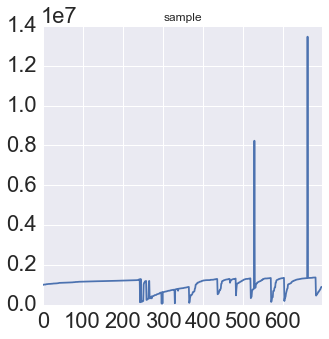

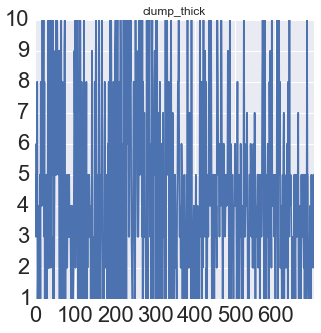

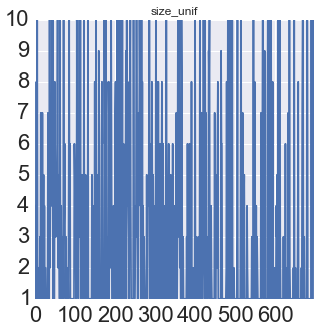

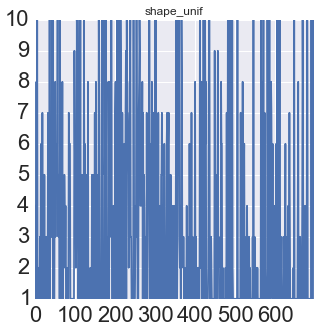

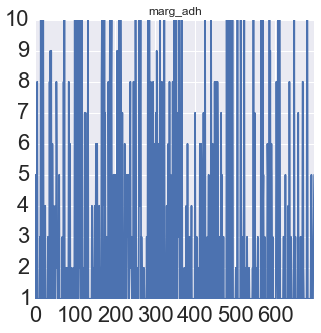

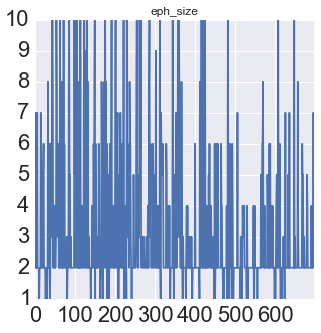

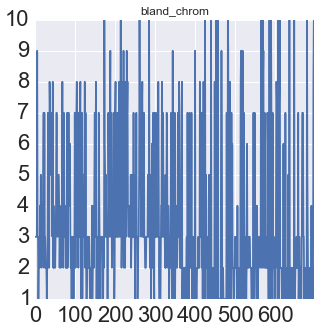

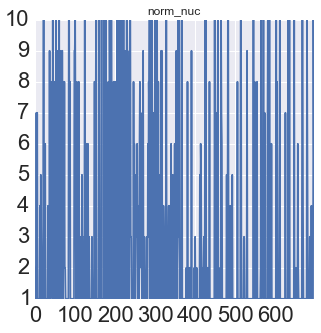

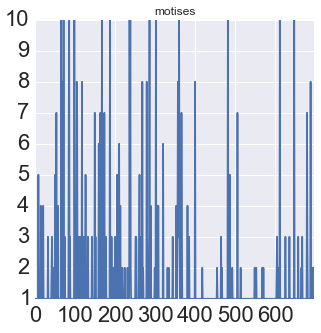

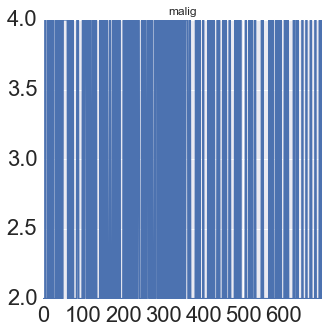

In [87]:
plot_columns(df, col_names)

#### Make histograms of all columns

Cannot plot:  bare_nuc


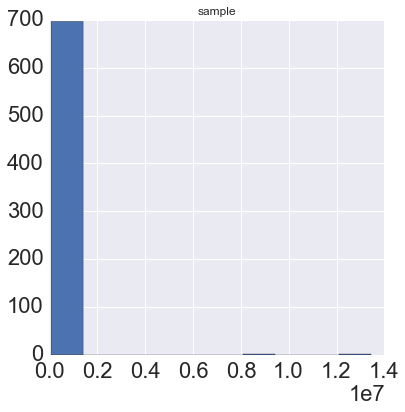

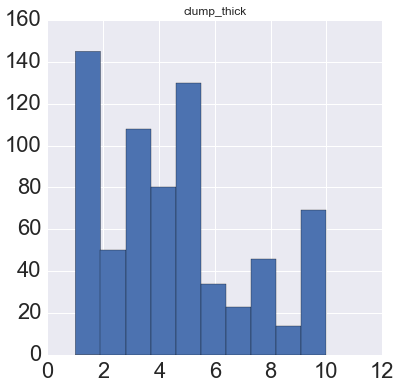

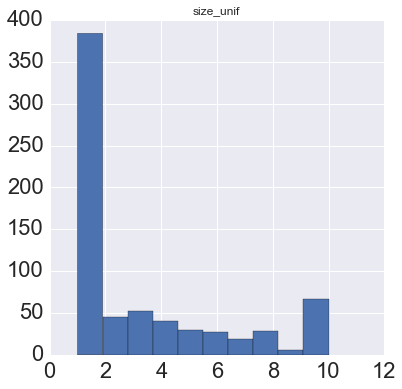

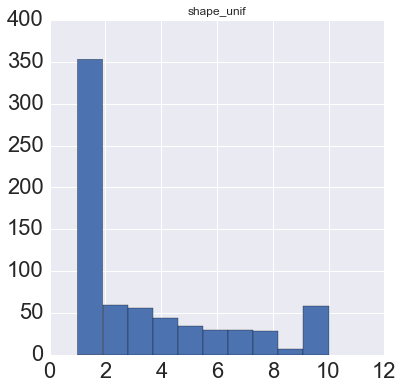

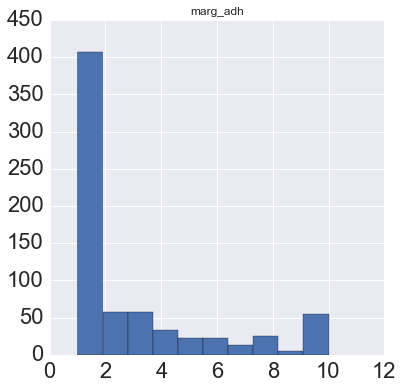

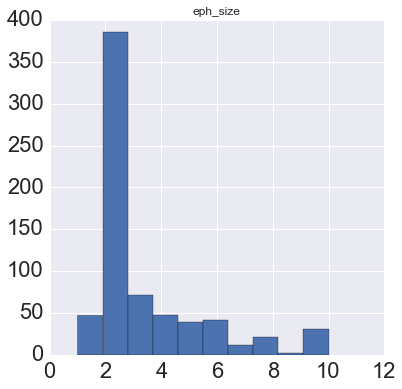

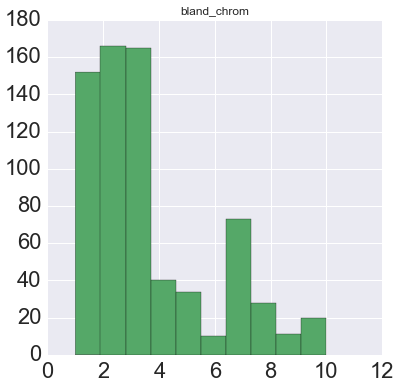

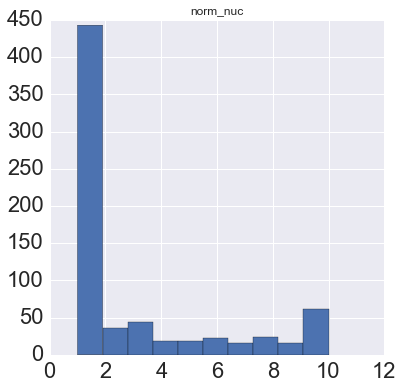

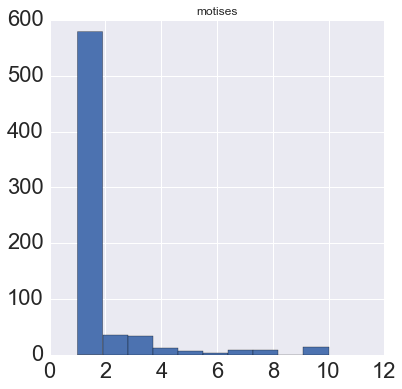

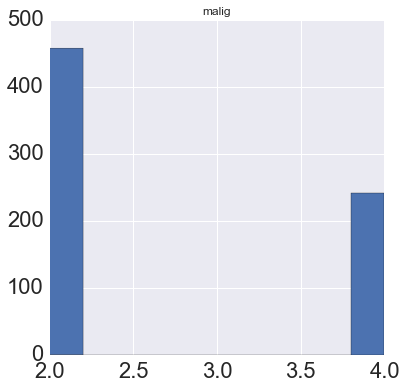

In [86]:
plot_column_hist(df, col_names)

#### Plot histograms for each column, segmented by another column

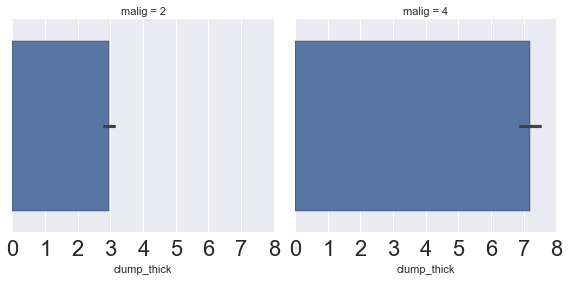

In [96]:
sns.factorplot("clump_thick", data=df, col="malig", kind='bar')

#### Plot columns against each other

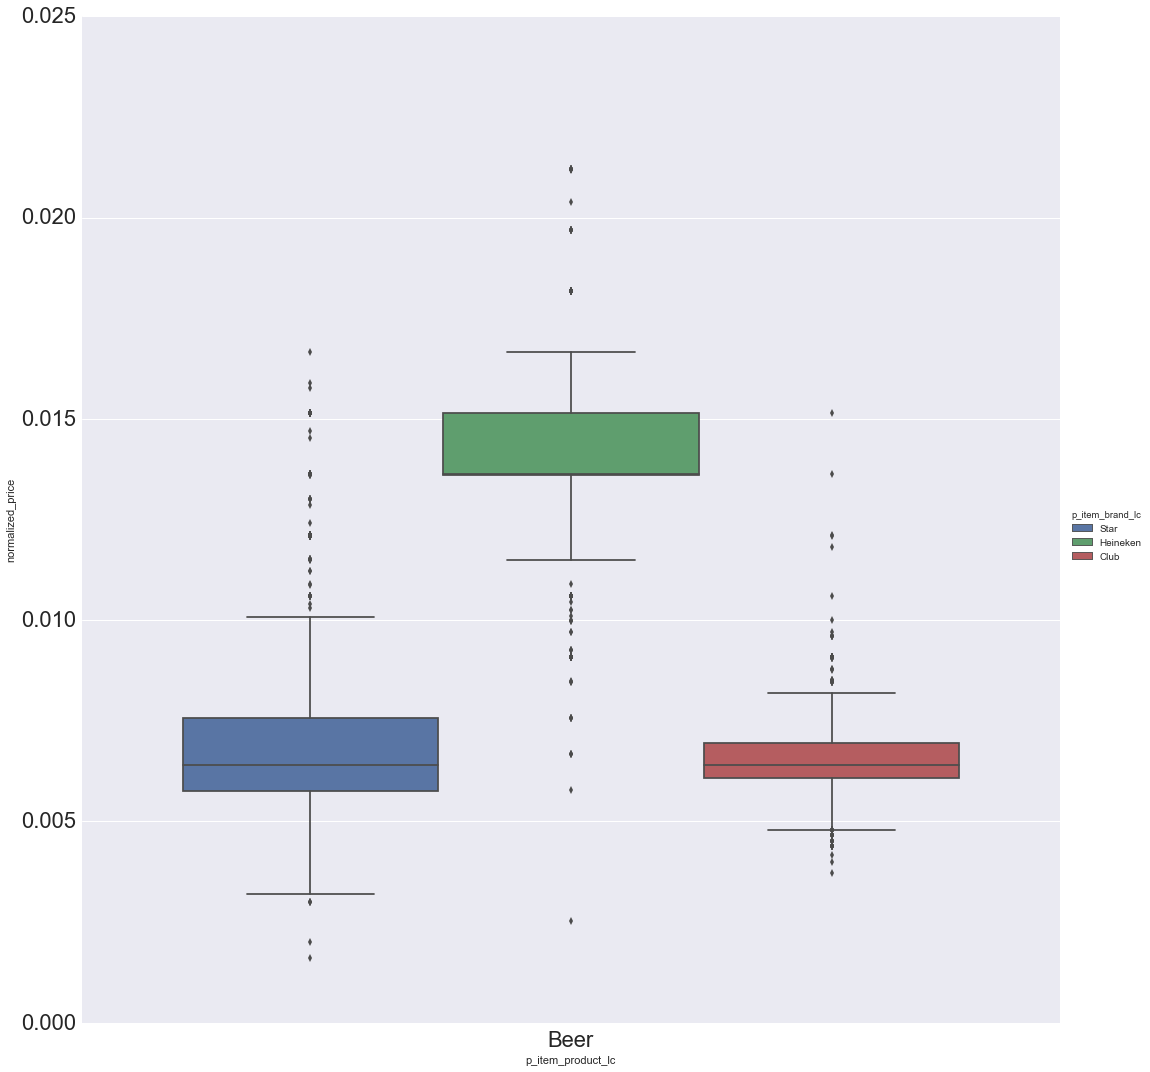

In [59]:
sns.set_context(font_scale=20)
sns.factorplot(x="p_item_product_lc", y="normalized_price", hue='p_item_brand_lc', data=df[df.p_item_product_lc == "Beer"], kind='box', size = 15, aspect=1)

#### Plot one column vs another, segmented by a third column

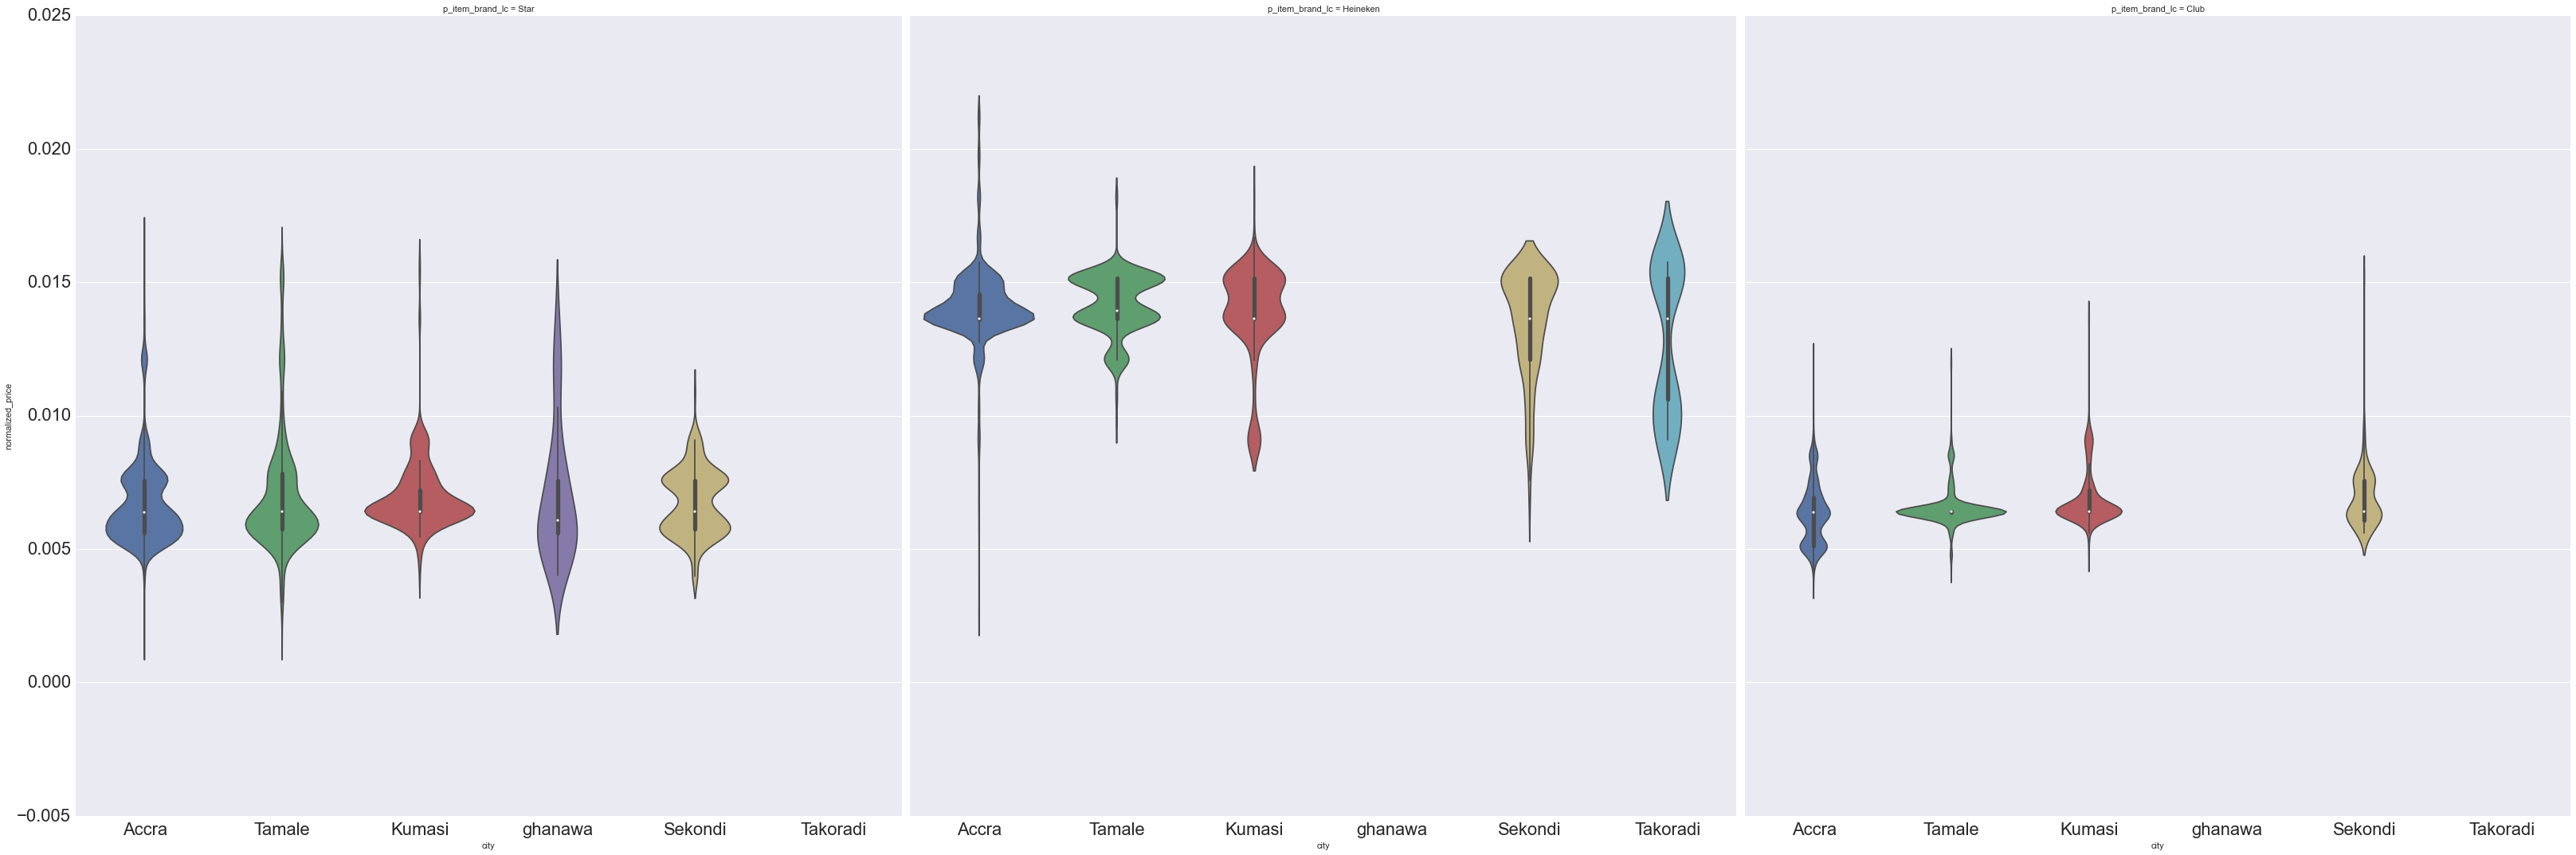

In [65]:
sns.factorplot(data=df[df.malig == "Beer"], x="city", y="malig", col="p_item_brand_lc", size = 15, aspect=1, kind='violin')

#### Plot histrograms of individual columns, segmented by other columns

In [114]:
# g = sns.FacetGrid(df, col="normalized_price")  
# g.map(sns.distplot, "p_item_product_lc")  

#### Plot columns against each other, segmented by a third column

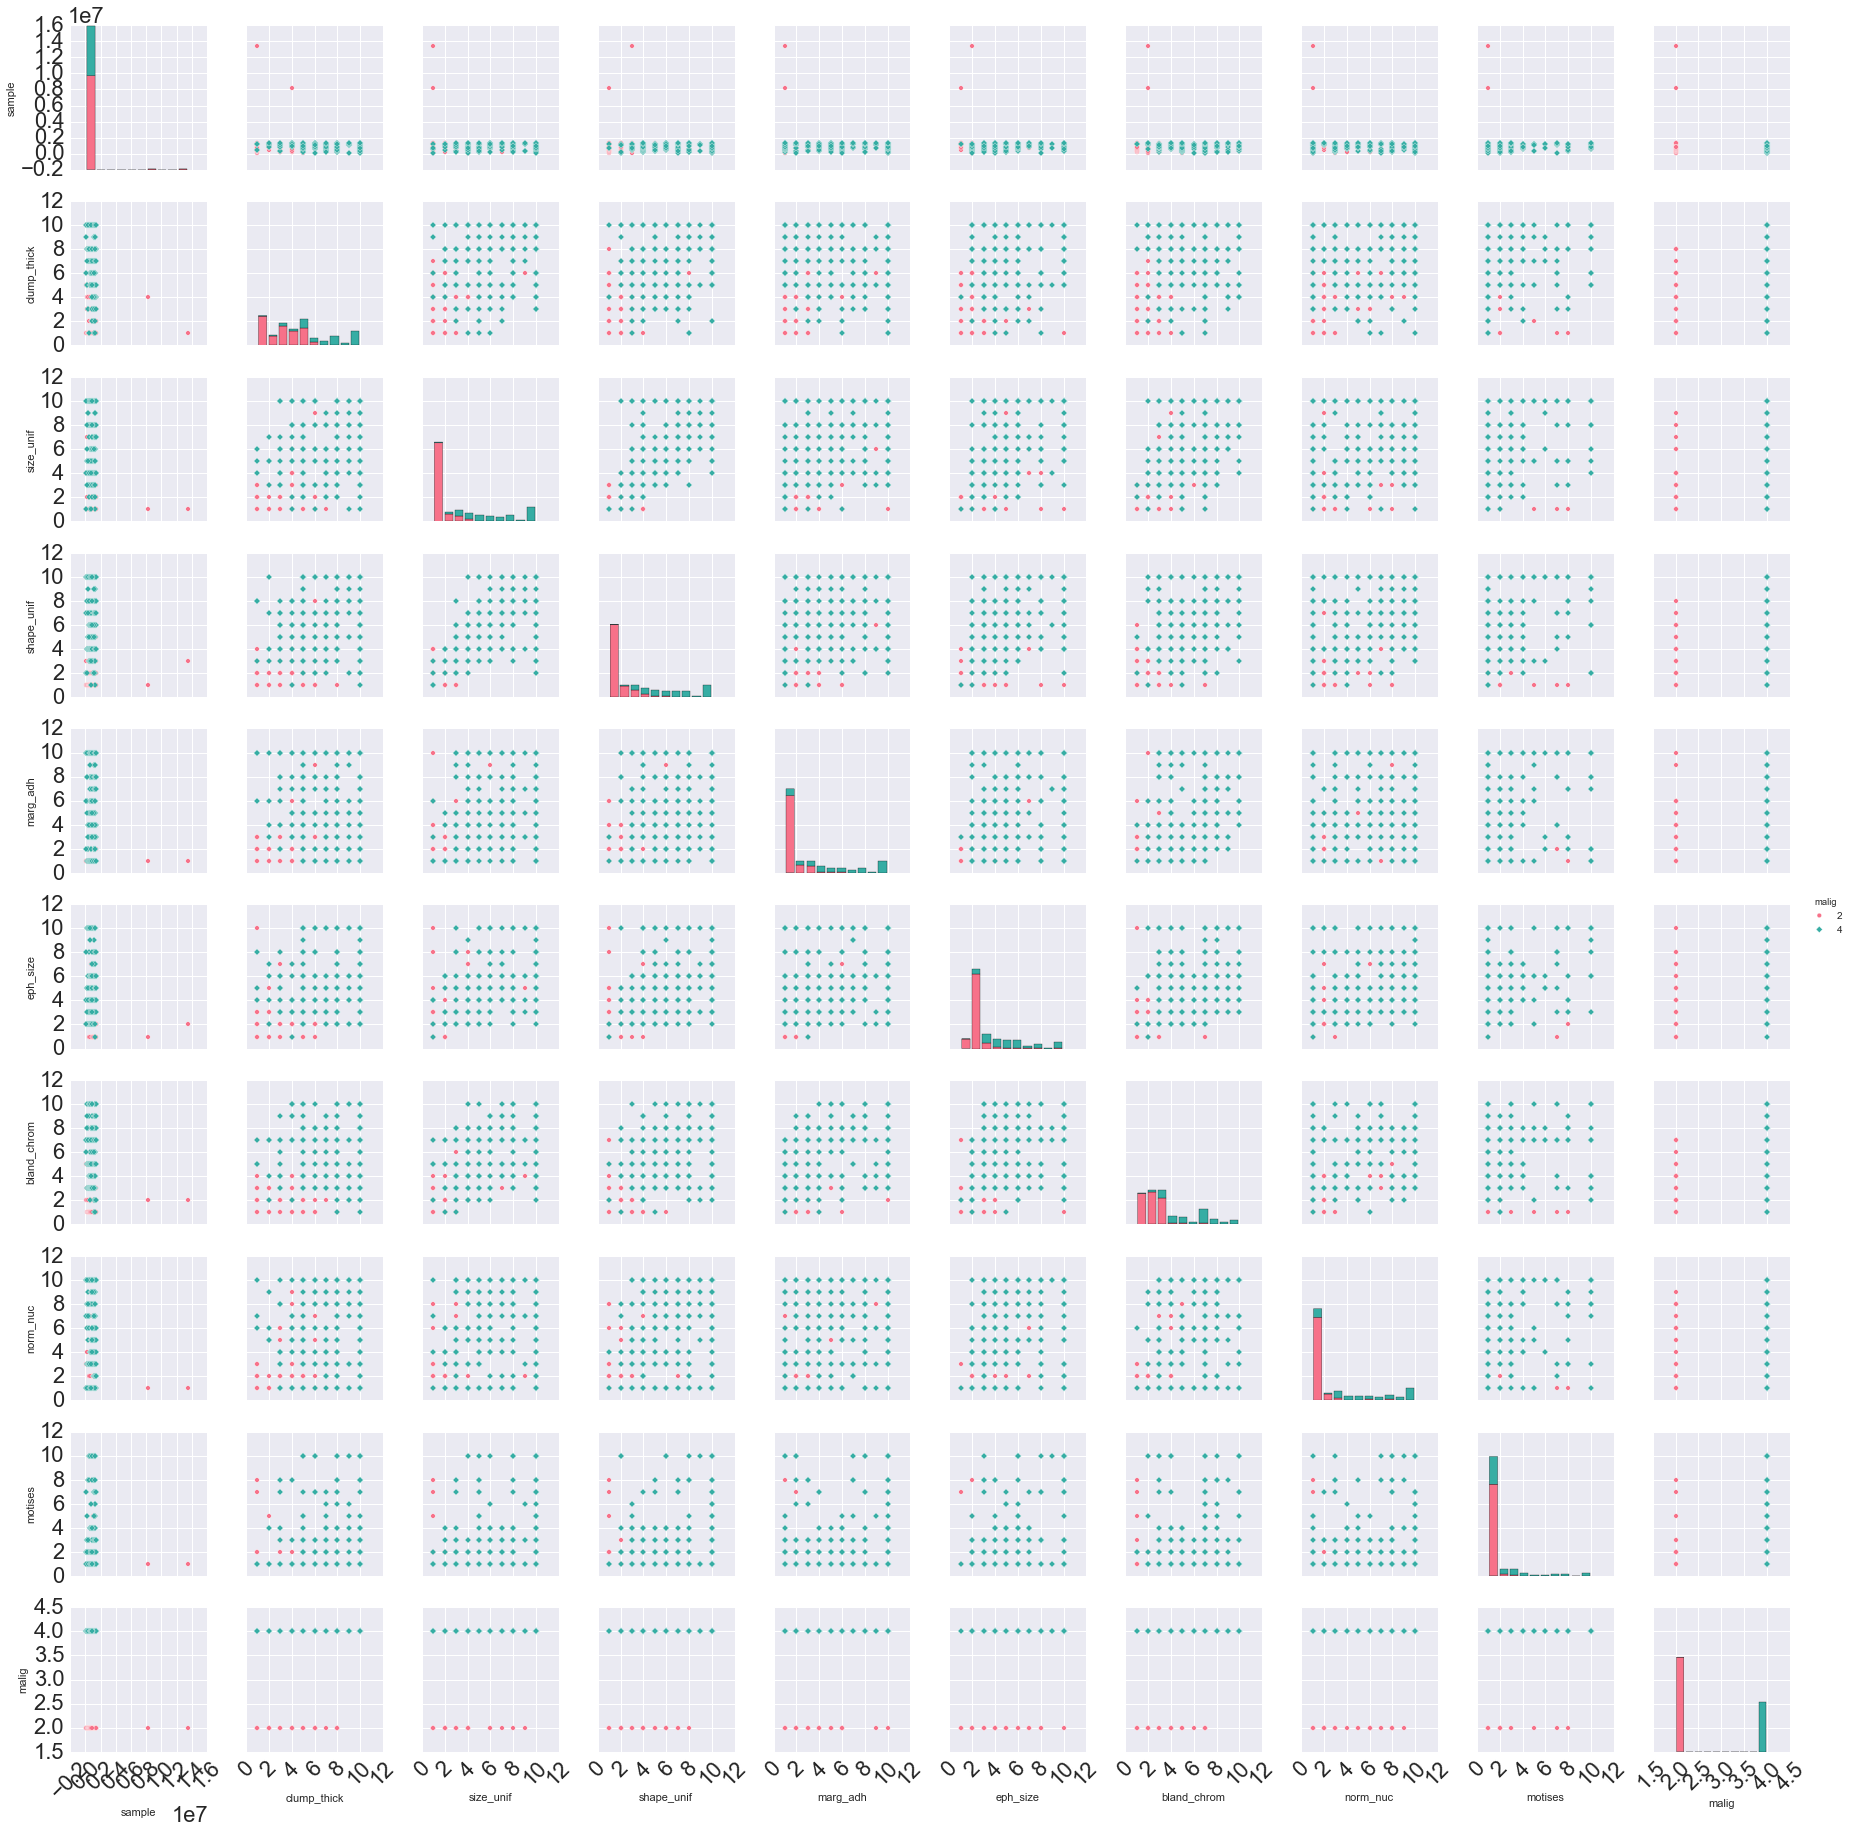

In [109]:
g = sns.pairplot(df[col_names], hue="malig", diag_kind="hist", palette="husl", markers=["o", "D"])  
for ax in g.axes.flat:  
    plt.setp(ax.get_xticklabels(), rotation=45)

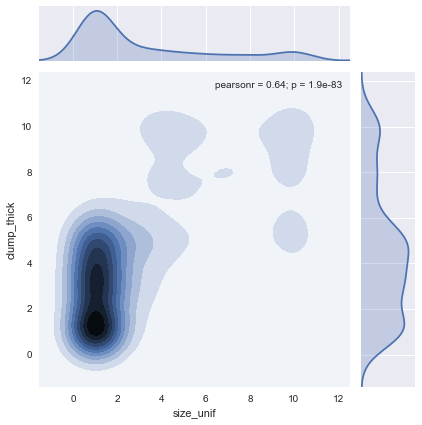

In [15]:
sns.jointplot("size_unif", "clump_thick", data=df, kind='kde')  

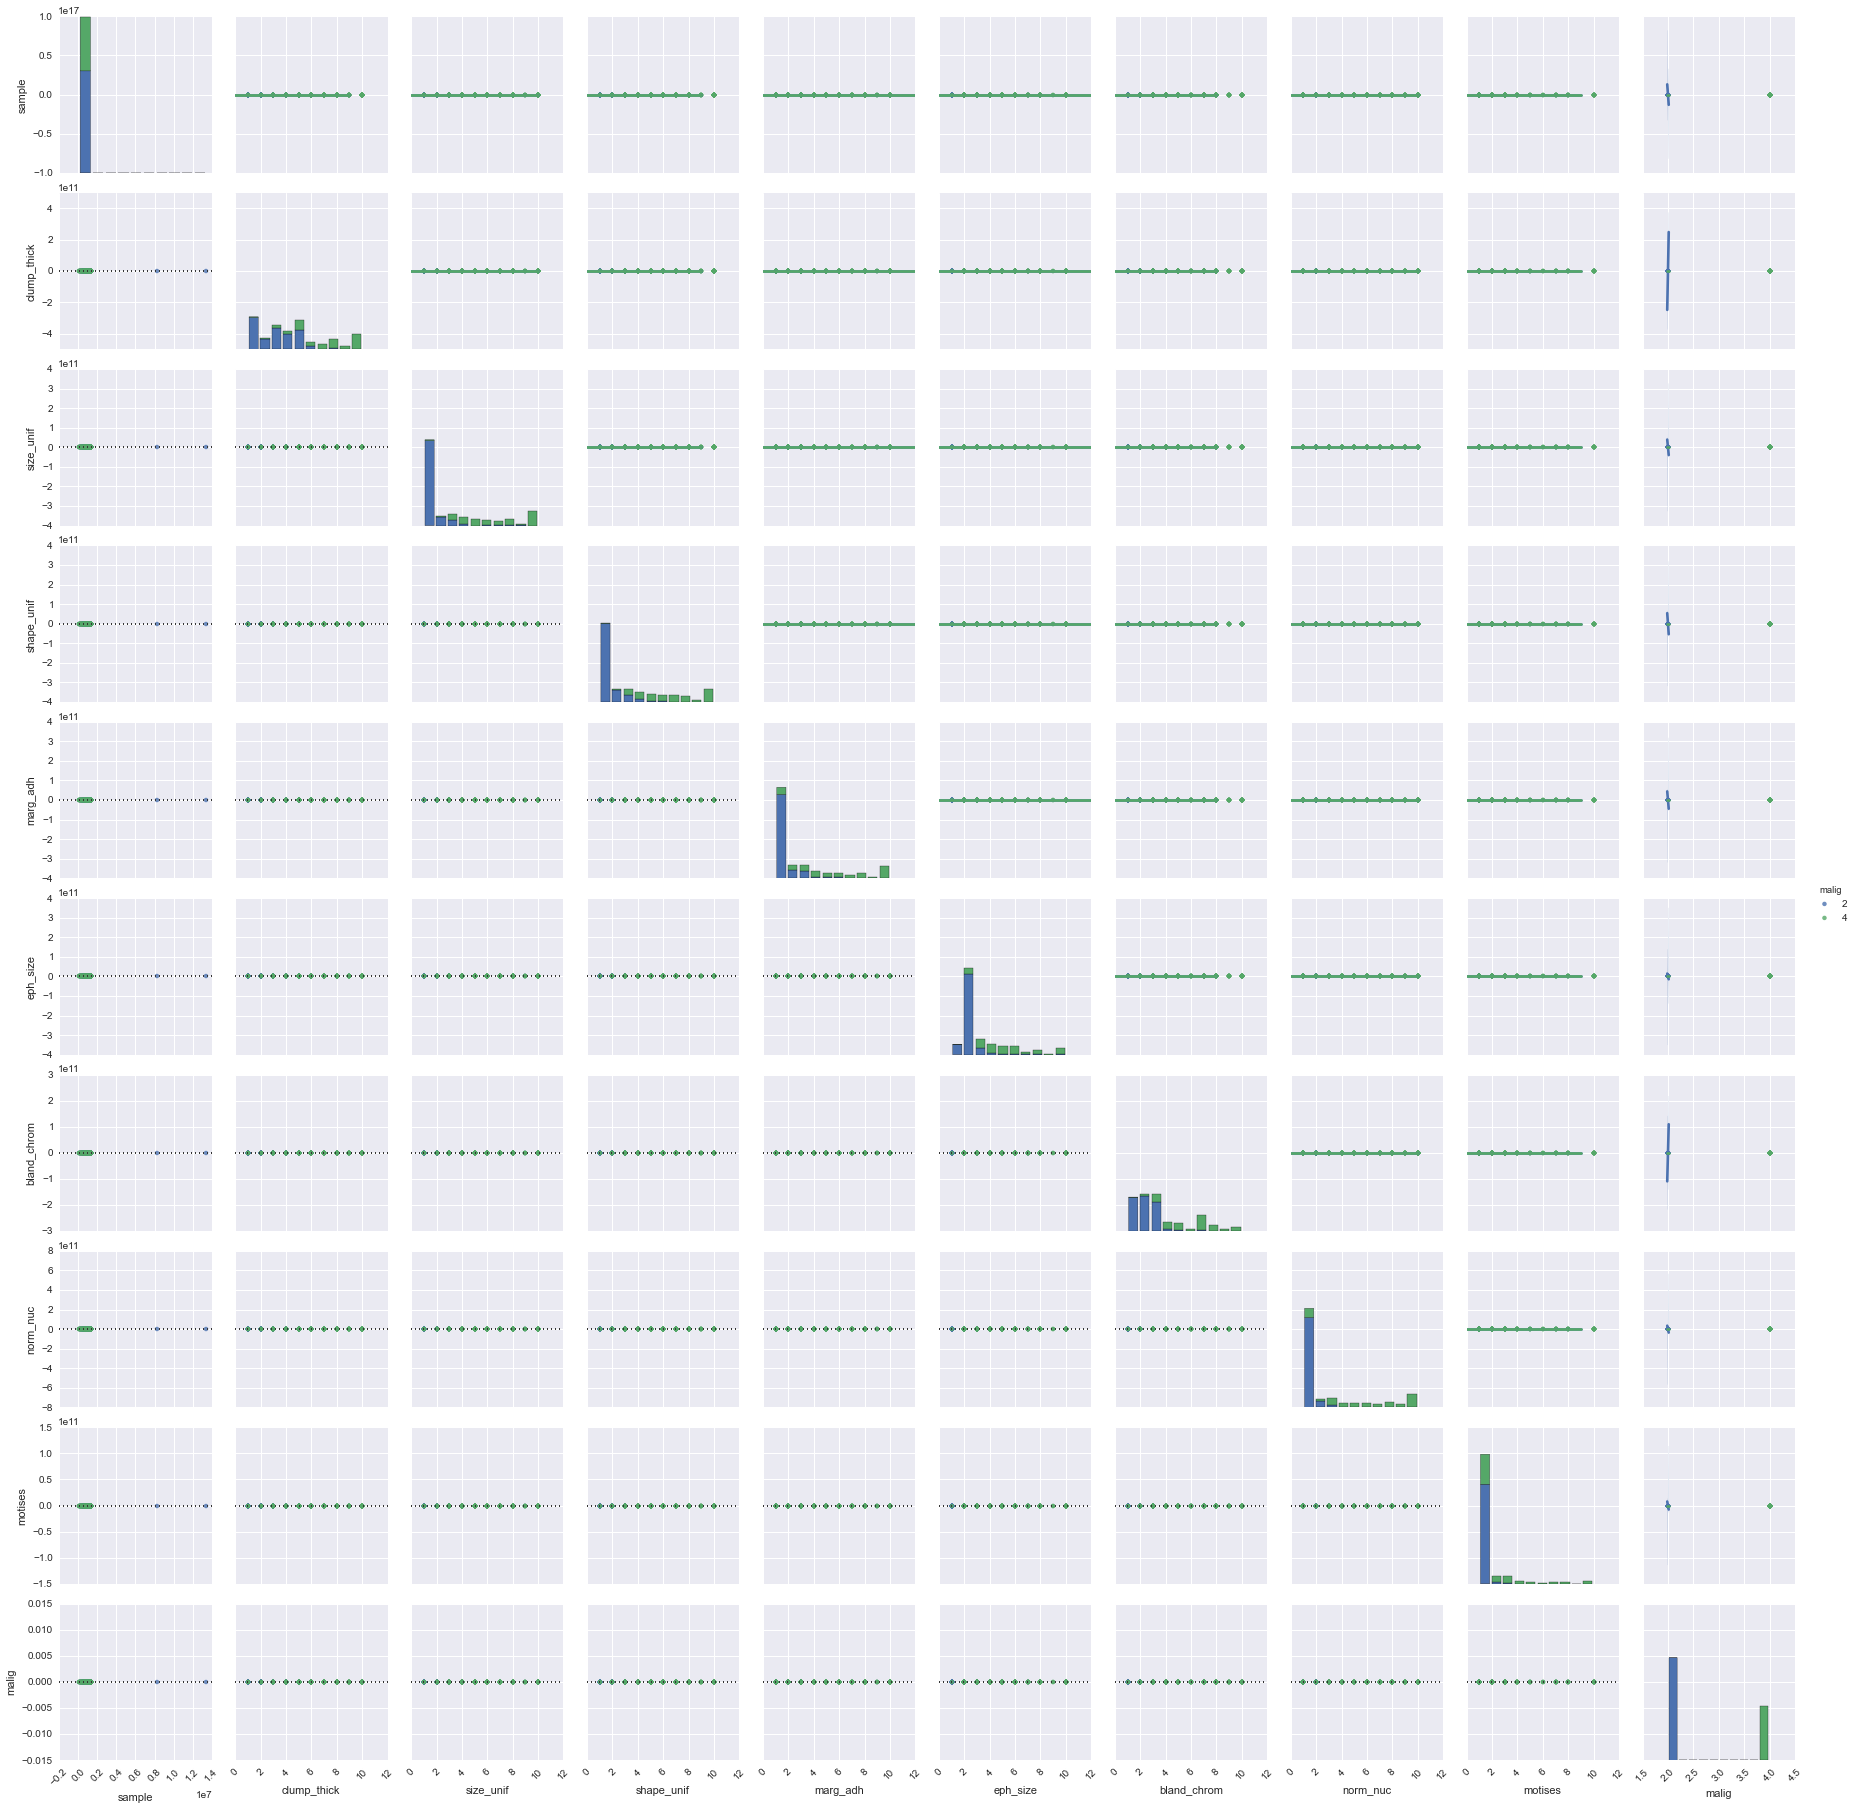

In [85]:
g = sns.PairGrid(df[col_names], hue="malig")  
g.map_upper(sns.regplot)  
g.map_lower(sns.residplot)  
g.map_diag(plt.hist)  
for ax in g.axes.flat:  
    plt.setp(ax.get_xticklabels(), rotation=45)
g.add_legend()  
g.set(alpha=0.5)  

#### Plot the feature correlations

/Users/berkeleyalmand/anaconda/lib/python2.7/site-packages/seaborn/linearmodels.py:1283: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
/Users/berkeleyalmand/anaconda/lib/python2.7/site-packages/seaborn/linearmodels.py:1349: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


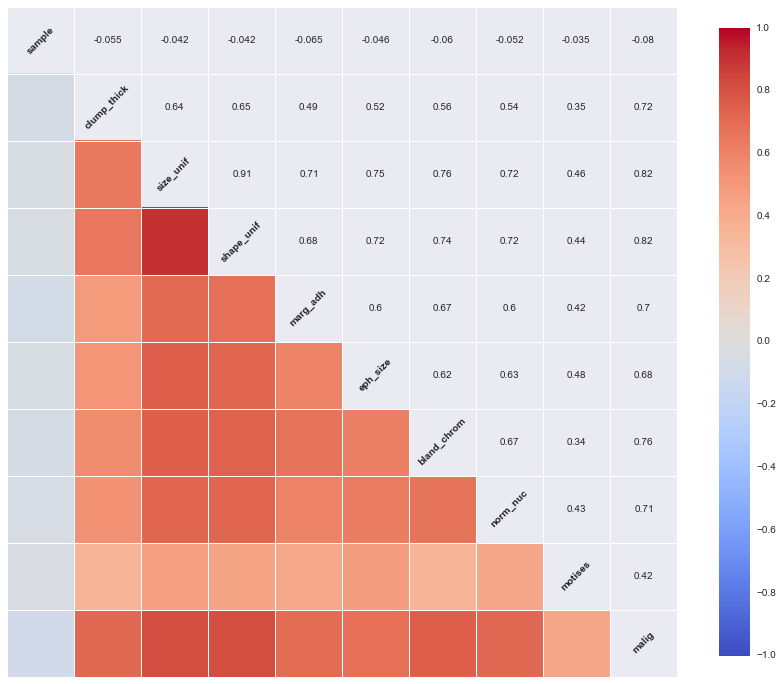

In [8]:
f, ax = plt.subplots(figsize=(15, 15))
sns.corrplot(df, annot=True, sig_stars=False,
             diag_names=True, ax=ax)

#### Enter columns to make dummy variables for.

In [88]:
# columns_to_encode = ['malig']
# df = make_dummy_variables(df, columns_to_encode)

In [12]:
for idx, row in df.iterrows():
    if row['malig'] == 2:
        df.malig[idx] = 0
    else:
        df.malig[idx] = 1

/Users/berkeleyalmand/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/berkeleyalmand/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [13]:
df.head()

,sample,clump_thick,size_unif,shape_unif,marg_adh,eph_size,bare_nuc,bland_chrom,norm_nuc,motises,malig
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


## Prepare Data for Modeling

#### Create interaction features

In [195]:
df_feat = df[features]

In [196]:
df_feat.head()

,clump_thick,size_unif,shape_unif,marg_adh,eph_size,bland_chrom,norm_nuc,motises
0,5,1,1,1,2,3,1,1
1,5,4,4,5,7,3,2,1
2,3,1,1,1,2,3,1,1
3,6,8,8,1,3,3,7,1
4,4,1,1,3,2,3,1,1


#### Create log features

In [197]:
df_feat = make_poly_feat(df_feat, features)

/Users/berkeleyalmand/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/berkeleyalmand/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/berkeleyalmand/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if i

In [198]:
df_feat.head()

,clump_thick,size_unif,shape_unif,marg_adh,eph_size,bland_chrom,norm_nuc,motises,log_clump_thick,sq_clump_thick,sqrt_clump_thick,log_size_unif,sq_size_unif,sqrt_size_unif,log_shape_unif,sq_shape_unif,sqrt_shape_unif,log_marg_adh,sq_marg_adh,sqrt_marg_adh,log_eph_size,sq_eph_size,sqrt_eph_size,log_bland_chrom,sq_bland_chrom,sqrt_bland_chrom,log_norm_nuc,sq_norm_nuc,sqrt_norm_nuc,log_motises,sq_motises,sqrt_motises
0,5,1,1,1,2,3,1,1,1.791759,25,2.236068,0.693147,1,1.000000,0.693147,1,1.000000,0.693147,1,1.000000,1.098612,4,1.414214,1.386294,9,1.732051,0.693147,1,1.000000,0.693147,1,1
1,5,4,4,5,7,3,2,1,1.791759,25,2.236068,1.609438,16,2.000000,1.609438,16,2.000000,1.791759,25,2.236068,2.079442,49,2.645751,1.386294,9,1.732051,1.098612,4,1.414214,0.693147,1,1
2,3,1,1,1,2,3,1,1,1.386294,9,1.732051,0.693147,1,1.000000,0.693147,1,1.000000,0.693147,1,1.000000,1.098612,4,1.414214,1.386294,9,1.732051,0.693147,1,1.000000,0.693147,1,1
3,6,8,8,1,3,3,7,1,1.945910,36,2.449490,2.197225,64,2.828427,2.197225,64,2.828427,0.693147,1,1.000000,1.386294,9,1.732051,1.386294,9,1.732051,2.079442,49,2.645751,0.693147,1,1
4,4,1,1,3,2,3,1,1,1.609438,16,2.000000,0.693147,1,1.000000,0.693147,1,1.000000,1.386294,9,1.732051,1.098612,4,1.414214,1.386294,9,1.732051,0.693147,1,1.000000,0.693147,1,1


#### Create interaction features

In [199]:
df_feat = create_interaction_feat(df_feat, features)

#### Make a list of all of the features, including the new ones

In [200]:
feat_all = list(df_feat.columns.values)

#### Set up X and y

In [201]:
y = df[ref_column].values
X_not_scaled = df_feat.values

#### Scale the data to have zero mean and unit variance.

In [202]:
X = scale(X_not_scaled)

#### Split the data into training and test sets

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [213]:
lrg = LogisticRegression(penalty='l1')
y_pred = cross_val_predict(lrg, X_train, y=y_train, cv=5)

#### Plot ROC curve. 

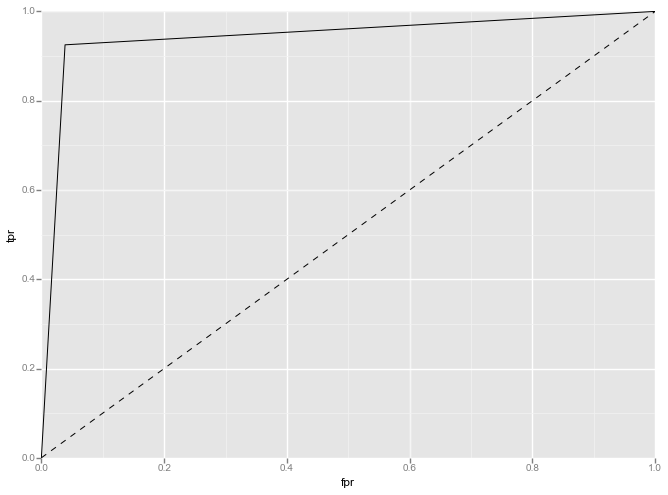

<ggplot: (300700777)>

In [238]:
fpr, tpr, thresholds = roc_curve(y_train, y_pred, pos_label=4)
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')